In [1]:
import pandas as pd
import numpy as np
import sklearn
import random
#from collections import counter

In [3]:
df = pd.read_csv('fraud_data.csv')

In [4]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13088 entries, 0 to 13087
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(18), object(31)
memory usage: 43.3+ MB


In [8]:
df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)

In [9]:
df.isFraud.value_counts()

0    12650
1      438
Name: isFraud, dtype: int64

In [10]:
# set x and y variables
y = df['isFraud']
x= df.loc[:, df.columns != 'isFraud']

from sklearn.model_selection import train_test_split


# Split randomly into 70% train data and 30% test data

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 123)




In [11]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9161 entries, 11896 to 3582
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(17), object(31)
memory usage: 30.3+ MB


In [13]:
xTrain.isnull().sum() #check how many missing/null values in each variable

TransactionID        0
TransactionDT        0
TransactionAmt       0
ProductCD            0
card1                0
                  ... 
id_36             6959
id_37             6959
id_38             6959
DeviceType        6960
DeviceInfo        7309
Length: 433, dtype: int64

In [14]:
# Eliminate automatically variables with more than 20% of missingness

xTrain_before_filling= xTrain
xTrain = xTrain[xTrain.columns[xTrain.isnull().mean() < 0.2]]

In [15]:
missing_cols=xTrain.columns[xTrain.isnull().mean() > 0]
print(missing_cols)

Index(['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
       'P_emaildomain', 'D1', 'D10',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=162)


In [16]:
xTrain['card5'].isnull().mean() # let us use this variable for comparison later, keep this in mind for now!

0.008077720772841393

In [17]:
xTrain_single= xTrain
cols= xTrain_single.columns
num_cols = xTrain_single.select_dtypes(include=np.number).columns
xTrain_single.loc[:,num_cols]=xTrain_single.loc[:,num_cols].fillna(xTrain_single.loc[:,num_cols].mean())
print(num_cols)
print(xTrain_single.loc[:,num_cols].mean())

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2',
       'card3', 'card5', 'addr1', 'addr2', 'C1',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=177)
TransactionID     3.282527e+06
TransactionDT     7.378680e+06
TransactionAmt    1.341026e+02
card1             9.938213e+03
card2             3.643289e+02
                      ...     
V317              2.830567e+02
V318              1.878344e+02
V319              1.609130e+01
V320              3.898510e+01
V321              2.610795e+01
Length: 177, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_16488\939180372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTrain_single.loc[:,num_cols]=xTrain_single.loc[:,num_cols].fillna(xTrain_single.loc[:,num_cols].mean())


In [18]:
cat_cols= list(set(cols) - set(num_cols))
xTrain_single.loc[:,cat_cols] = xTrain_single.loc[:,cat_cols].fillna(xTrain.loc[:,cat_cols].mode().iloc[0])
train_cols = xTrain_single.columns
print(cat_cols)
print(xTrain_single.loc[:,cat_cols].mode().iloc[0])

['card4', 'P_emaildomain', 'card6', 'ProductCD']
card4                 visa
P_emaildomain    gmail.com
card6                debit
ProductCD                W
Name: 0, dtype: object


C:\Users\User\AppData\Local\Temp\ipykernel_16488\609063849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTrain_single.loc[:,cat_cols] = xTrain_single.loc[:,cat_cols].fillna(xTrain.loc[:,cat_cols].mode().iloc[0])


In [19]:
xTrain_single.columns[xTrain_single.isnull().mean() > 0] # select those variables with missing values

Index([], dtype='object')

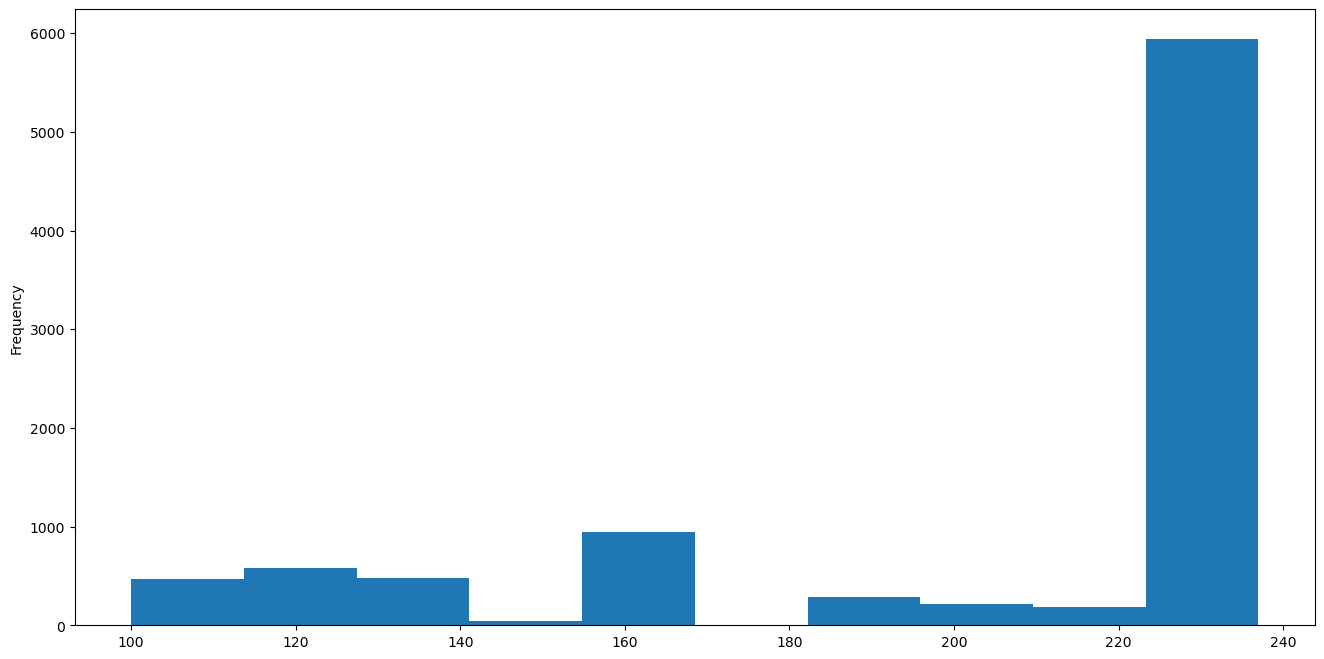

In [20]:
xTrain_single['card5'].plot.hist(figsize=(16,8));

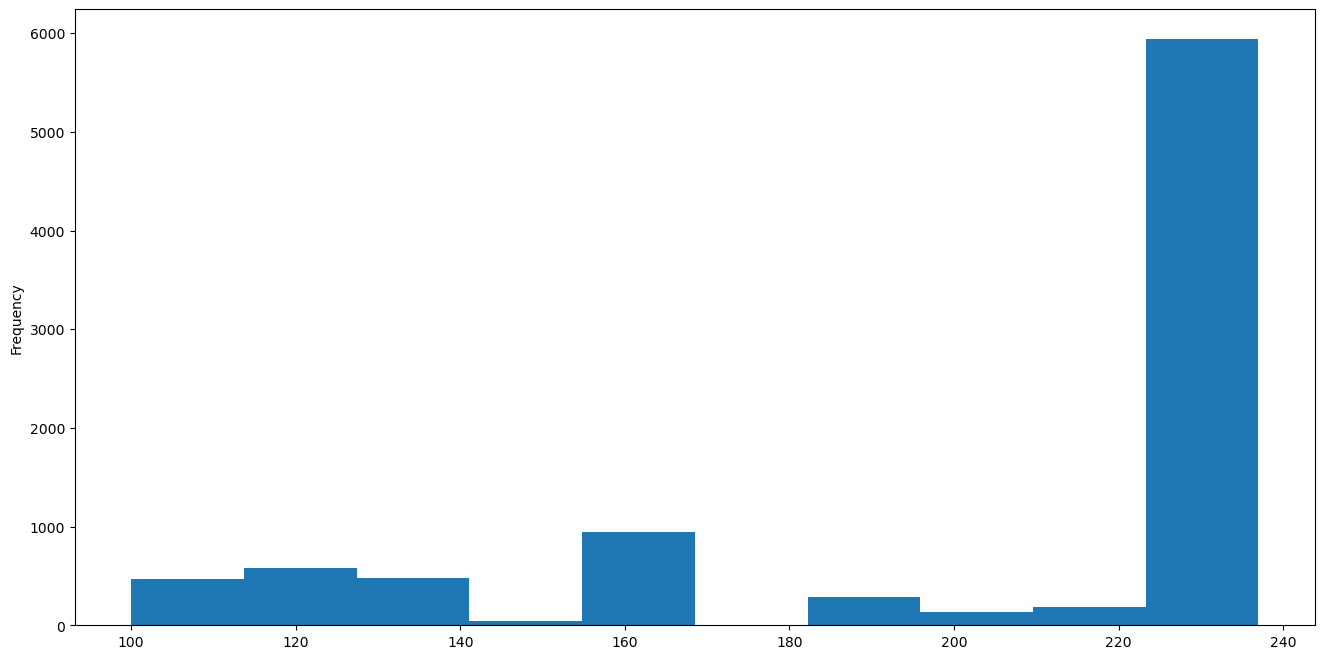

In [21]:
xTrain_before_filling['card5'].plot.hist(figsize=(16,8));

In [22]:
xTrain_single['card5'].describe()

count    9161.000000
mean      199.608342
std        40.989469
min       100.000000
25%       166.000000
50%       226.000000
75%       226.000000
max       237.000000
Name: card5, dtype: float64

In [23]:
xTrain_before_filling['card5'].describe()

count    9087.000000
mean      199.608342
std        41.156048
min       100.000000
25%       166.000000
50%       226.000000
75%       226.000000
max       237.000000
Name: card5, dtype: float64

In [24]:
### The variable 'card5' didn't change much as a whole (except for very slight change in standard deviation of the variable) even after filling with mean values. So filling values isn't changing the existing variables much because of filling with measures like mean of the variable. It just models to not misunderstand missing values


In [25]:
xTrain= xTrain_single # let us single imputed data as further data for preprocessing in the next step

In [26]:
xTrain.info()
xTrain_dummy = pd.get_dummies(xTrain, prefix_sep='_', drop_first=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9161 entries, 11896 to 3582
Columns: 181 entries, TransactionID to V321
dtypes: float64(160), int64(17), object(4)
memory usage: 12.7+ MB


In [27]:
xTrain_dummy

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,P_emaildomain_twc.com,P_emaildomain_verizon.net,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
11896,3225154,5615484,167.000,6019,583.0,150.0,226.0,204.000000,87.000000,1,...,0,0,0,0,1,0,0,0,0,0
4511,3319921,8196611,171.000,14355,127.0,150.0,117.0,177.000000,87.000000,1,...,0,0,0,0,0,0,0,0,0,0
5754,3087540,2038234,59.000,14762,480.0,150.0,117.0,472.000000,87.000000,1,...,0,0,0,0,1,0,0,0,0,0
12425,3541718,14666189,117.000,4272,111.0,150.0,226.0,299.000000,87.000000,1,...,0,0,0,0,0,0,0,0,0,0
2179,3411322,10733664,82.950,14290,512.0,150.0,226.0,444.000000,87.000000,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,3058266,1608480,20.522,15885,545.0,185.0,138.0,289.624616,86.792286,1,...,0,0,0,0,0,0,0,0,0,0
12252,3400905,10444882,113.950,7207,111.0,150.0,226.0,204.000000,87.000000,7,...,0,0,0,0,0,0,0,0,0,0
1346,3461491,12259883,39.000,13840,555.0,150.0,226.0,299.000000,87.000000,1,...,0,0,0,0,0,0,0,0,0,1
11646,3416312,10857502,26.950,10960,567.0,150.0,117.0,191.000000,87.000000,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
final_tr = pd.DataFrame(data=xTrain_dummy)

print(final_tr.head())
print(final_tr.shape)

       TransactionID  TransactionDT  TransactionAmt  card1  card2  card3  \
11896        3225154        5615484          167.00   6019  583.0  150.0   
4511         3319921        8196611          171.00  14355  127.0  150.0   
5754         3087540        2038234           59.00  14762  480.0  150.0   
12425        3541718       14666189          117.00   4272  111.0  150.0   
2179         3411322       10733664           82.95  14290  512.0  150.0   

       card5  addr1  addr2  C1  ...  P_emaildomain_twc.com  \
11896  226.0  204.0   87.0   1  ...                      0   
4511   117.0  177.0   87.0   1  ...                      0   
5754   117.0  472.0   87.0   1  ...                      0   
12425  226.0  299.0   87.0   1  ...                      0   
2179   226.0  444.0   87.0   7  ...                      0   

       P_emaildomain_verizon.net  P_emaildomain_web.de  \
11896                          0                     0   
4511                           0                     0

In [29]:
## Decision Tree using grid search CV
from sklearn import tree
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4,cv=5,scoring = 'roc_auc')
clf.fit(X=final_tr, y=yTrain)
dt = clf.best_estimator_ #final decision tree!
print (clf.best_score_, clf.best_params_)


0.7302162620197661 {'max_depth': 6}


In [33]:
cols= xTest.columns
num_cols = xTest.select_dtypes(include=np.number).columns
xTest.loc[:,num_cols] = xTest.loc[:,num_cols].fillna(xTest.loc[:,num_cols].mean())

cat_cols= list(set(cols) - set(num_cols))
xTest.loc[:,cat_cols] = xTest.loc[:,cat_cols].fillna(xTest.loc[:,cat_cols].mode().iloc[0])
test_cols = xTest.columns

In [37]:
#train_cols = xTrain.columns
xTest = xTest[train_cols]

In [40]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [42]:
from sklearn import preprocessing
scaled_tr = preprocessing.StandardScaler().fit_transform(xTrain_dummy)
final_tr = pd.DataFrame(data=scaled_tr)
final_tr.columns= xTrain_dummy.columns
final_tr
print(final_tr.head())
print(final_tr.shape)

   TransactionID  TransactionDT  TransactionAmt     card1     card2     card3  \
0      -0.336705      -0.382177        0.143567 -0.802971  1.403072 -0.272831   
1       0.219455       0.177288        0.161023  0.904914 -1.522787 -0.272831   
2      -1.144322      -1.157553       -0.327753  0.988301  0.742187 -0.272831   
3       1.521118       1.579583       -0.074637 -1.160898 -1.625449 -0.272831   
4       0.755861       0.727200       -0.223234  0.891597  0.947511 -0.272831   

      card5     addr1     addr2        C1  ...  P_emaildomain_twc.com  \
0  0.643900 -0.896916  0.074805 -0.102887  ...              -0.023369   
1 -2.015465 -1.179741  0.074805 -0.102887  ...              -0.023369   
2 -2.015465  1.910379  0.074805 -0.102887  ...              -0.023369   
3  0.643900  0.098207  0.074805 -0.102887  ...              -0.023369   
4  0.643900  1.617079  0.074805 -0.052577  ...              -0.023369   

   P_emaildomain_verizon.net  P_emaildomain_web.de  \
0                  -